# 5장 머신러닝

## <u>초모수와 모델 검증</u>

1. 모델 클래스 선택<br>
2. 모델 초모수 선택<br>
3. 모델을 훈현 데이터에 적합<br>
4. 모델을 사용해 새 데이터에 대한 레이블 예측<br>

### 모델 검증에 대한 고려사항

#### 잘못된 방식의 모델 검증

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

#### 올바른 방식의 모델 검증: 검정 표본

In [5]:
from sklearn.cross_validation import train_test_split
# 데이터를 각각 50%로 나눔
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# 모델을 이 가운데 하나의 데이터 집합에 적합시킴
model.fit(X1, y1)

# 모델을 두 번째 데이터 집합으로 검증함
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9066666666666666

#### 교차 검증을 통한 모델 검증

In [6]:
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [7]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [8]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()

0.96

#### 최적의 모델 선택하기

- 더 복잡하거나 더 유연한 모델 사용<br>
- 덜 복잡하거나 덜 유연한 모델 사용<br>
- 더 많은 훈련 표본 수집<br>
- 각 표본에 특징을 추가하기 위해 더 많은 데이터 수집

#### 편향-분산 트레이드오프

- 고편형 모델의 경우, 검정 표본에서의 모델 성능이 훈련 표본에서의 성능과 유사하다<br>
- 고분산 모델의 경우, 검증 표본에서의 모델 성능이 훈련 표본에서의 성능보다 훨씬 더 떨어진다.<br>

- 검증 곡선(validation carve)<br>
- 훈련 점수는 언제나 검증 점수보다 높다. 모델은 아직 보지 못한 데이터보다 이미 본 데이터에 잘 적합하기 떄문에 이것은 당연한 결과라고 볼 수 있다.<br>
- 모델 복잡도가 너무 낮은 경우(고편향 모델) 훈련 데이터가 과소적합되는데, 이믄 모델이 훈련 데이터와 미리 보지 않은 데이터 모두를 예측하지 못한다는 뜻이다.<br>
- 모델 복잡도가 너무 높은 경우(고분산 모델) 훈련 데이터가 과적합되는데, 이것은 모델이 훈련 데이터는 매우 잘 예측하지만 본적이 없는 데이터에 대해서는 예측에 실패한다는 뜻이다.<br>
- 중간값에서 검증 곡선은 최대값 가진다. 복잡도가 이 수준이라는 것은 편향과 분산 사이의 적절한 트레이드오프가 이뤄졌음을 나타낸다.

<b>Scikit-Learn의 검증 곡선</b>

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [11]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

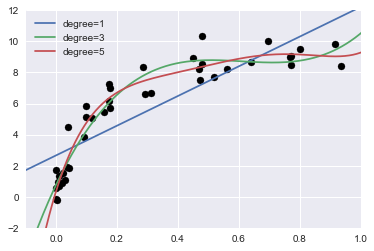

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


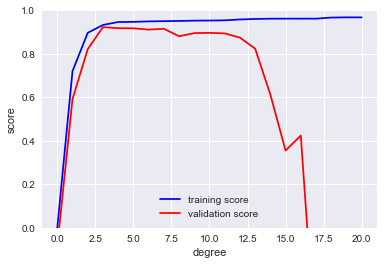

In [13]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

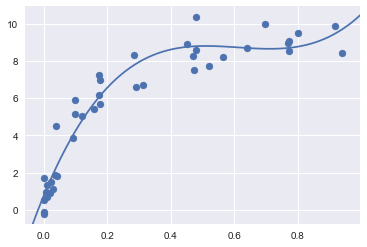

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### 학습 곡선

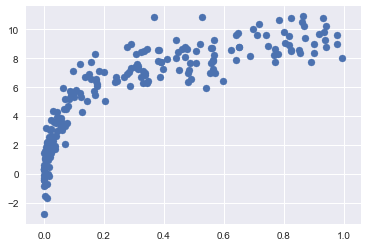

In [15]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

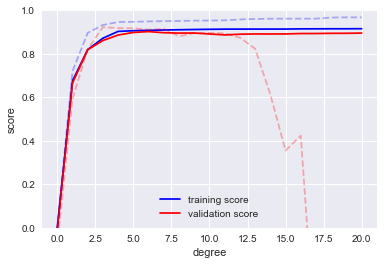

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

- 해당 복잡도의 모델은 작은 데이터세트를 과적합한다. 이는 상대적으로 훈련점수는 높지만 검증 점수는 낮다는 의미다<br>
- 해당 복잡도의 모델은 큰 데이터세트를 과소적합한다. 이는 훈련점수는 감소하지만 검증 점수는 증가함을 의미한다.<br>
- 모델은 우연한 겨우를 제외하고는 결코 훈련 집합보다 검증 집합에 더 좋은 점수를 주지 않는다. 이는 훈련 점수와 검증 점수의 두 곡선이 점점 더 가까워지기는 해도 절대 교차하지는 않는다는 뜻이다

#### Scikit-Learn의 학습 곡선

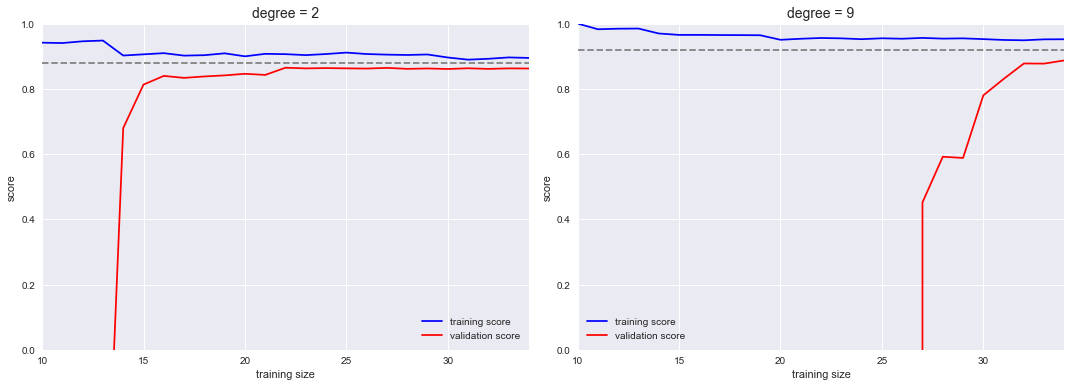

In [17]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

#### 실제 검증: 그리드 검색

In [18]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
grid.fit(X, y);

In [20]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3356: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


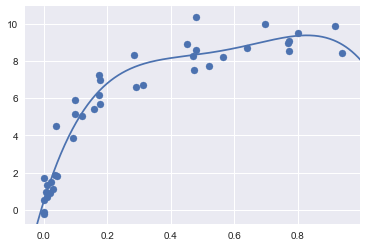

In [21]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

### 정리